<a href="https://colab.research.google.com/github/ms624atyale/PictureBook_Project_Demo/blob/main/3_mattrbyauthor_ccw_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐹🐾 <font color = 'green'>>**Python code for MATTR** broken into multiple code cells for tableau including ['Data Size] using len( )

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld
import glob

#!git clone https://github.com/ms624atyale/PictureBook_Project_Demo
%cd /content/PictureBook_Project_Demo/Data_Frame

# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Go back to main directory
%cd /content/PictureBook_Project_Demo/Data_Frame

# Save as CSV 🍎🍎🍎🍎🍎
df.to_csv("./pg_2creators_10books.csv", index=False)

# Display the DataFrame
print(df)
df



/content/PictureBook_Project_Demo/Data_Frame
/content/PictureBook_Project_Demo/Data_Frame
                                                text  \
0  a carrion crow sat on an oak   fol de riddle l...   
1  the golden goose there was once a man who had ...   
2  johnny crow would dig and sow  till he made a ...   
3  the man in the moon             the man in the...   
4  one morning a little rabbit sat on a bank  he ...   
5  a farmyard tale     for     ralph and betsy   ...   
6  once upon a time there was a little girl calle...   
7  once upon a time there were four little rabbit...   
8  this is a tale about a tail a tail that belong...   
9  once upon a time there were three little kitte...   

                            title          creator  
0         the tailor and the crow    leslie brooke  
1                the golden goose    leslie brooke  
2            johnny crow's garden    leslie brooke  
3                 a nursery rhyme    leslie brooke  
4      the tale of benjamin 

,text,title,creator
0,a carrion crow sat on an oak fol de riddle l...,the tailor and the crow,leslie brooke
1,the golden goose there was once a man who had ...,the golden goose,leslie brooke
2,johnny crow would dig and sow till he made a ...,johnny crow's garden,leslie brooke
3,the man in the moon the man in the...,a nursery rhyme,leslie brooke
4,one morning a little rabbit sat on a bank he ...,the tale of benjamin bunny,beatrix potter
5,a farmyard tale for ralph and betsy ...,the tale of jemima puddle-duck,beatrix potter
6,once upon a time there was a little girl calle...,the tale of mrs tiggy-winkle,beatrix potter
7,once upon a time there were four little rabbit...,the tale of peter rabbit,beatrix potter
8,this is a tale about a tail a tail that belong...,the tale of squirrel nutkin,beatrix potter
9,once upon a time there were three little kitte...,the tale of tom kitten,beatrix potter


In [ ]:
import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded) 🍎🍎🍎🍎🍎
df = pd.read_csv("./pg_2creators_10books.csv", sep=",")

In [ ]:
!pip install textstat
import textstat

# Added column: String length for estimating data size
length = []

for i in range(0, len(df['text'])):
  LEN = len(df['text'][i])
  length.append(LEN)

df['Data size'] = length


# Added columns:  Number of Splitted words & Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['text'])):
  TSP = df['text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)

df['Splits'] = tsplit
df['N_Splits'] = splen

# Added column: Lemma 표제어
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['text'])):
  LEM = ld.flemmatize(df['text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma


# ADD LD indices

#1. Create two empty lists--one for Type to Token Ratio and the other Moving Average Type to Token Ratio.
TTR = []
MATTR = []

#2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)

  #2-1. Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


#3. Add columns for TTR and MATTR
df['TTR'] = TTR
df['MATTR'] = MATTR

print(df)
df_selected = df[['creator','N_Splits','MATTR']]
df_selected



['a', 'carrion', 'crow', 'sit', 'on', 'a', 'oak', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hi', 'ding', 'do', 'watch', 'a', 'tailor', 'shape', 'his', 'cloak', 'sing', 'heigh', 'ho', 'the', 'carrion', 'crow', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hi', 'ding', 'do', 'wife', 'bring', 'me', 'my', 'old', 'bend', 'bow', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hi', 'ding', 'do', 'that', 'i', 'may', 'shoot', 'yon', 'carrion', 'crow', 'sing', 'heigh', 'ho', 'the', 'carrion', 'crow', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hi', 'ding', 'do', 'the', 'tailor', 'he', 'shot', 'and', 'miss', 'his', 'mark', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hi', 'ding', 'do', 'and', 'shot', 'his', 'own', 'sow', 'quite', 'through', 'the', 'heart', 'sing', 'heigh', 'ho', 'the', 'carrion', 'crow', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hi', 'ding', 'do', 'wife', 'bring', 'brandy', 'in', 'a', 'spoon', 'fol', 'de', 'riddle', 'lol', 'de', 'riddle', 'hiding', 'do', 'for', 'ou

,creator,N_Splits,MATTR
0,leslie brooke,153,0.577500
1,leslie brooke,5124,0.725868
2,leslie brooke,216,0.638084
3,leslie brooke,518,0.637399
4,beatrix potter,1122,0.778434
5,beatrix potter,1263,0.787068
6,beatrix potter,1304,0.779187
7,beatrix potter,956,0.798611
8,beatrix potter,1208,0.783037
9,beatrix potter,697,0.767809


In [ ]:
# Clean up creator names
df['creator'] = df['creator'].str.strip().str.lower()

df_creator_ld = df.groupby("creator")['MATTR'].mean().reset_index()
df_creator_ld = df_creator_ld.round(6)

# --- STEP 6: Save and display results ---
df_creator_ld.to_csv('LD_by_creator.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!\n")
df_creator_ld

✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!



,creator,MATTR
0,beatrix potter,0.782358
1,leslie brooke,0.644713


#<font color = 'red'> **Common Core Words for all 2 creators saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset 🍎🍎🍎🍎🍎
file_path = "/content/PictureBook_Project_Demo/Data_Frame/pg_2creators_10books.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'text' not in df_ccw.columns or 'creator' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'text' and 'creator' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV 🍎🍎🍎🍎🍎
common_words_df.to_csv("2creators_common_core_words.csv", index=False)

print("Common core words extracted and saved as '2creators_common_core_words.csv'!")

Common core words extracted and saved as '2creators_common_core_words.csv'!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


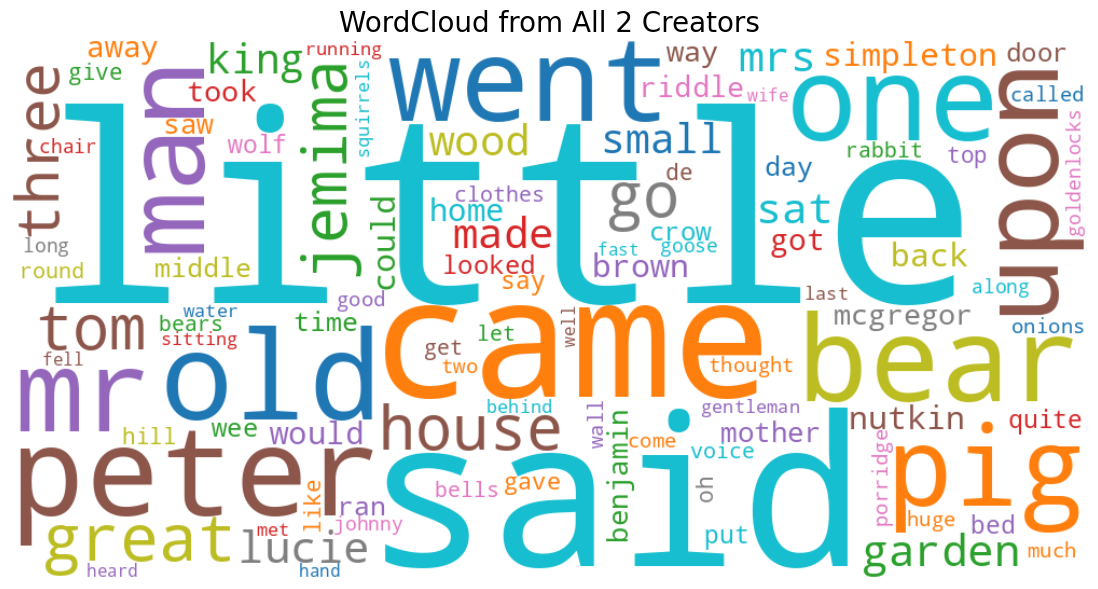

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)🍎🍎🍎🍎🍎
input_file = "/content/PictureBook_Project_Demo/Data_Frame/2creators_common_core_words.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from All 2 Creators", fontsize=20)
plt.show()